In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [111]:
train_df = pd.read_csv('assets/master_clean_train.csv')
test_df = pd.read_csv('assets/master_clean_test.csv')

CSVs have had 'duplicate' rows removed.  Traps which contain > 50 mosquitoes get > 1 row.  These other rows are removed, without accounting for the extra mosquitos.

In [5]:
train_df.shape

(9686, 29)

In [112]:
test_df.shape

(116293, 28)

In [113]:
train_df.columns

Index(['date', 'address', 'block', 'street', 'trap', 'addressnumberandstreet',
       'latitude', 'longitude', 'addressaccuracy', 'nummosquitos',
       'wnvpresent', 'neighborhood', 'dtdate', 'species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'neighborhood_infection_category_high',
       'neighborhood_infection_category_low',
       'neighborhood_infection_category_medium',
       'neighborhood_infection_category_none', 'park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed'],
      dtype='object')

In [114]:
test_df.columns

Index(['id', 'date', 'address', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'neighborhood', 'dtdate', 'species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'neighborhood_infection_category_high',
       'neighborhood_infection_category_low',
       'neighborhood_infection_category_medium',
       'neighborhood_infection_category_none', 'park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed'],
      dtype='object')

In [115]:
train_df

,date,address,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,...,neighborhood_infection_category_none,park_score,daylight,avg_tavg,avg_preciptotal,avg_avgspeed,timelaggeddaylight,timelaggedtemperature,timelaggedprecipitation,timelaggedwindspeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,0,0.575236,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,0,0.575236,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,0,0.574931,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,0,0.480842,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,0,0.480842,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,...,0,1.658591,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,...,0,1.150050,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,...,0,1.193890,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,...,0,1.193890,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,...,0,1.190674,14,75.5,0.000,6.95,13.660461,69.1875,0.053103,9.652273


In [116]:
print('Accuracy for baseline model is {0:.3f}.'.format(1-train_df.wnvpresent.mean()))

Accuracy for baseline model is 0.948.


In [2]:
def balance_classes(train_df):
    pass

### train on num mosqitos

In [103]:
X_train = train_df[['species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans','park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed']].values
y_train = train_df['nummosquitos'].values

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.model_selection import cross_val_score

In [28]:
from sklearn.preprocessing import StandardScaler

In [104]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)

In [105]:
linreg = LinearRegression()
#scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores = cross_val_score(linreg, X_train_s, y_train, cv=5)

In [106]:
scores

array([-0.13967852, -0.00456464,  0.02529572, -0.08277466, -0.13917259])

In [107]:
linreg.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
linreg.coef_

array([ 3.57859365,  5.05030279,  2.64909355, -0.6557118 , -0.14046113,
        0.01307281, -0.49942524,  0.94152489,  1.17468407,  1.64016503,
       -0.10051253,  0.09984468])

In [109]:
linreg.intercept_

10.217117489159618

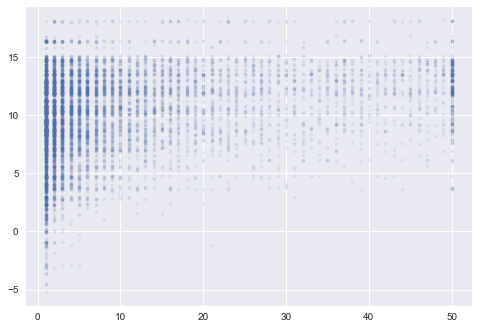

In [110]:
plt.plot(y_train, linreg.predict(X_train_s), '.', alpha=0.1)

In [46]:
train_df.corr().nummosquitos.sort_values()

neighborhood_infection_category_low      -0.138611
species_culex_restuans                   -0.104139
neighborhood_infection_category_none     -0.087358
longitude                                -0.070677
addressaccuracy                          -0.067985
latitude                                 -0.056949
block                                    -0.051793
timelaggedwindspeed                      -0.047788
park_score                               -0.046351
neighborhood_infection_category_medium   -0.044718
avg_preciptotal                          -0.007089
timelaggedprecipitation                  -0.003188
species_culex_pipiens                     0.006744
avg_avgspeed                              0.032763
daylight                                  0.057134
avg_tavg                                  0.125844
species_culex_pipiens_restuans            0.126568
timelaggeddaylight                        0.149279
timelaggedtemperature                     0.170776
neighborhood_infection_category

This looks like a bunch of crap to me.  Can't predict number of mosquitos

### AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import time

In [120]:
X_train = train_df[['species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'neighborhood_infection_category_high',
       'neighborhood_infection_category_low',
       'neighborhood_infection_category_medium',
       'neighborhood_infection_category_none', 'park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed']].values
y_train = train_df['wnvpresent'].values

Tell AdaBoost to weight classes with method 'balanced'

In [149]:
time_start = time.time()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'))
ada_params = {
    'base_estimator__max_depth': [2,3,4,5],
    'n_estimators': [10, 20, 30, 50, 100, 200]
}
gs_ada = GridSearchCV(ada, param_grid=ada_params, scoring='roc_auc', cv=5)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)
print('Elapsed time is {0:.2E}s'.format(time.time()-time_start))

0.5860479184822577
{'base_estimator__max_depth': 4, 'n_estimators': 200}
Elapsed time is 1.26E+02s


Tell AdaBoost to weight classes uniformly

In [150]:
time_start = time.time()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight=None))
ada_params = {
    'base_estimator__max_depth': [2,3,4,5],
    'n_estimators': [10, 20, 30, 50, 100, 200]
}
gs_ada = GridSearchCV(ada, param_grid=ada_params, scoring='roc_auc', cv=5)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)
print('Elapsed time is {0:.2E}s'.format(time.time()-time_start))

0.5640943088053957
{'base_estimator__max_depth': 4, 'n_estimators': 200}
Elapsed time is 1.16E+02s


In [152]:
time_start = time.time()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'))
ada_params = {
    'base_estimator__max_depth': [3,4,5,6],
    'n_estimators': [100,200,300,400,500,700,1000]
            }
gs_ada = GridSearchCV(ada, param_grid=ada_params, scoring='roc_auc', cv=5)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)
print('Elapsed time is {0:.2E}s'.format(time.time()-time_start))

0.5532993380949174
{'base_estimator__max_depth': 4, 'n_estimators': 100}
Elapsed time is 9.70E+02s


In [124]:
pd.DataFrame(gs_ada.cv_results_).sort_values(by='mean_test_score')

C:\Users\James\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\James\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\James\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\James\Anaconda3\envs\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_base_estimator__max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,0.316109,0.011478,0.448339,0.942398,3,30,"{'base_estimator__max_depth': 3, 'n_estimators...",24,0.678210,0.930088,...,0.352321,0.943922,0.140910,0.947407,0.357402,0.965555,0.002481,0.000316,0.216603,0.014264
1,0.163101,0.007589,0.461760,0.901774,2,20,"{'base_estimator__max_depth': 2, 'n_estimators...",23,0.658755,0.885988,...,0.344206,0.908685,0.199205,0.908448,0.351974,0.931008,0.007430,0.000198,0.209373,0.019632
7,0.235167,0.008588,0.463477,0.927920,3,20,"{'base_estimator__max_depth': 3, 'n_estimators...",22,0.655298,0.914313,...,0.339630,0.929201,0.188845,0.933524,0.426353,0.952653,0.016649,0.000738,0.194013,0.015195
2,0.249936,0.012277,0.464534,0.911851,2,30,"{'base_estimator__max_depth': 2, 'n_estimators...",21,0.652498,0.897115,...,0.303425,0.916320,0.217135,0.916664,0.389662,0.941009,0.012977,0.001686,0.207458,0.018288
9,0.529715,0.017867,0.474884,0.960403,3,50,"{'base_estimator__max_depth': 3, 'n_estimators...",20,0.670074,0.950062,...,0.378294,0.960535,0.187342,0.963266,0.393878,0.979498,0.005991,0.000200,0.204613,0.011116
0,0.084351,0.004388,0.476052,0.883767,2,10,"{'base_estimator__max_depth': 2, 'n_estimators...",19,0.620526,0.865611,...,0.348917,0.891825,0.219733,0.896377,0.370256,0.911174,0.005509,0.000198,0.215666,0.020975
6,0.108694,0.005091,0.482607,0.906794,3,10,"{'base_estimator__max_depth': 3, 'n_estimators...",18,0.592750,0.893069,...,0.254025,0.911477,0.220169,0.912414,0.562658,0.934629,0.003661,0.000798,0.214506,0.017959
10,1.128693,0.035930,0.487314,0.979319,3,100,"{'base_estimator__max_depth': 3, 'n_estimators...",17,0.692754,0.973481,...,0.396304,0.978785,0.240191,0.980969,0.335368,0.990056,0.008873,0.002229,0.207574,0.006140
12,0.138642,0.005686,0.493604,0.931157,4,10,"{'base_estimator__max_depth': 4, 'n_estimators...",16,0.669963,0.916036,...,0.388211,0.935725,0.197108,0.937056,0.535553,0.956278,0.003449,0.001199,0.181913,0.016336
18,0.150924,0.005087,0.495516,0.953199,5,10,"{'base_estimator__max_depth': 5, 'n_estimators...",15,0.707476,0.942719,...,0.416348,0.952458,0.244254,0.956426,0.386087,0.970612,0.001885,0.000482,0.188715,0.010126


In [125]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=30)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=30, random_state=None)

In [126]:
ada.feature_importances_

array([0.02982953, 0.03036123, 0.0329975 , 0.00225393, 0.01349937,
       0.00962313, 0.00762229, 0.35532005, 0.01842025, 0.06083808,
       0.04559938, 0.05421686, 0.08690435, 0.07409205, 0.06567495,
       0.11274706])

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [131]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)

In [132]:
X_train.shape

(9686, 16)

In [135]:
logreg = LogisticRegression()
scores = cross_val_score(logreg,X_train_s,y_train,scoring='roc_auc', cv=5)

In [136]:
scores

array([0.82081472, 0.86930909, 0.51293812, 0.48522876, 0.74400327])

In [137]:
np.mean(scores)

0.6864587898205107

In [138]:
gs_params = {'C': np.logspace(-5,5,11), 'class_weight':[None, 'balanced'], 'penalty': ['l1', 'l2']}
gs = GridSearchCV(logreg, gs_params, scoring='roc_auc', cv=5)
gs.fit(X_train_s,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]), 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [139]:
gs.best_score_

0.6947170657371059

In [140]:
gs.best_params_

{'C': 1e-05, 'class_weight': 'balanced', 'penalty': 'l2'}

In [141]:
logreg = LogisticRegression(C=1e-5, class_weight='balanced', penalty='l2')
logreg.fit(X_train_s,y_train)

LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [142]:
logreg.coef_

array([[ 0.01044474,  0.00147075, -0.0097141 ,  0.00662049, -0.00601508,
        -0.00034908, -0.0038419 , -0.00105562, -0.00979488,  0.00725116,
        -0.00067778, -0.00296096,  0.00460744,  0.0070889 , -0.00822995,
        -0.01245983]])

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc = RandomForestClassifier(class_weight='balanced')
scores = cross_val_score(rfc,X_train,y_train,scoring='roc_auc', cv=5)

In [145]:
scores

array([0.60683314, 0.57550785, 0.37313312, 0.10327342, 0.29831972])

In [147]:
np.mean(scores)

0.3914134495080364

In [154]:
train_df.date = pd.to_datetime(train_df.date)

In [155]:
import datetime as dt

In [157]:
train_df['month'] = train_df.date.map(lambda d: d.month)

In [166]:
X_train = train_df[['species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'neighborhood_infection_category_high',
       'neighborhood_infection_category_low',
       'neighborhood_infection_category_medium',
       'neighborhood_infection_category_none', 'park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed', 'month']].values
y_train = train_df['wnvpresent'].values

In [167]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)

In [170]:
logreg = LogisticRegression(class_weight='balanced')
scores = cross_val_score(logreg,X_train_s,y_train,scoring='roc_auc', cv=5)

In [171]:
scores

array([0.79214658, 0.79601912, 0.53638897, 0.49038126, 0.65488017])

In [172]:
np.mean(scores)

0.6539632217888924

Bootstrap the minority class

In [173]:
from imblearn.over_sampling import SMOTE

In [174]:
smote = SMOTE(ratio='minority')

In [175]:
X_train_os, y_train_os = smote.fit_sample(X_train, y_train)

In [181]:
ss = StandardScaler()
X_train_os_s = ss.fit_transform(X_train_os)

In [182]:
logreg = LogisticRegression(class_weight='balanced')
scores = cross_val_score(logreg,X_train_os_s,y_train_os,scoring='roc_auc', cv=5)

In [183]:
scores

array([0.58060303, 0.66977724, 0.76775227, 0.79463472, 0.69525758])

In [184]:
np.mean(scores)

0.701604967889167

In [185]:
np.mean(y_train_os)

0.5

In [186]:
logreg.fit(X_train_os_s,y_train_os)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [187]:
logreg.coef_

array([[ 2.29129147,  2.36902268,  1.5013149 ,  0.31249717, -0.38790558,
         0.131089  , -0.84101622, -0.13029964, -1.25390588,  0.15796594,
        -0.08907447,  0.19836593,  1.40922001,  0.14548113, -0.23520537,
        -0.16733777,  0.59167986]])

In [212]:
from sklearn.metrics import roc_auc_score

In [215]:
roc_auc_score(y_train, logreg.predict(ss.transform(X_train)))

0.7404133404949806